In [1]:
import sys
from pathlib import Path
root = Path().resolve().parent.parent
sys.path.append(root)


import pandas as pd
from saudi_arabia.strats.hurst import HurstGoldSilverStrategy

In [2]:
data = pd.read_csv(root / 'data' / 'goldsilver.csv', index_col=0)
data = data.iloc[:,:2]
data.index = pd.to_datetime(data.index)
data.dropna(how='all', inplace=True)

In [5]:
strategy = HurstGoldSilverStrategy(initial_capital=100_000,
                                   hurst_window=500,
                                   hurst_threshold=0.3,
                                   transaction_cost=0.0,
                                   signal_window=300)

results, metrics = strategy.backtest(data)
print(f"Sharpe Ratio: {metrics['sharpe_ratio']:.2f}")
print(f"Total P&L: ${metrics['total_pnl']:.2f}")

Sharpe Ratio: -0.08
Total P&L: $-129.88


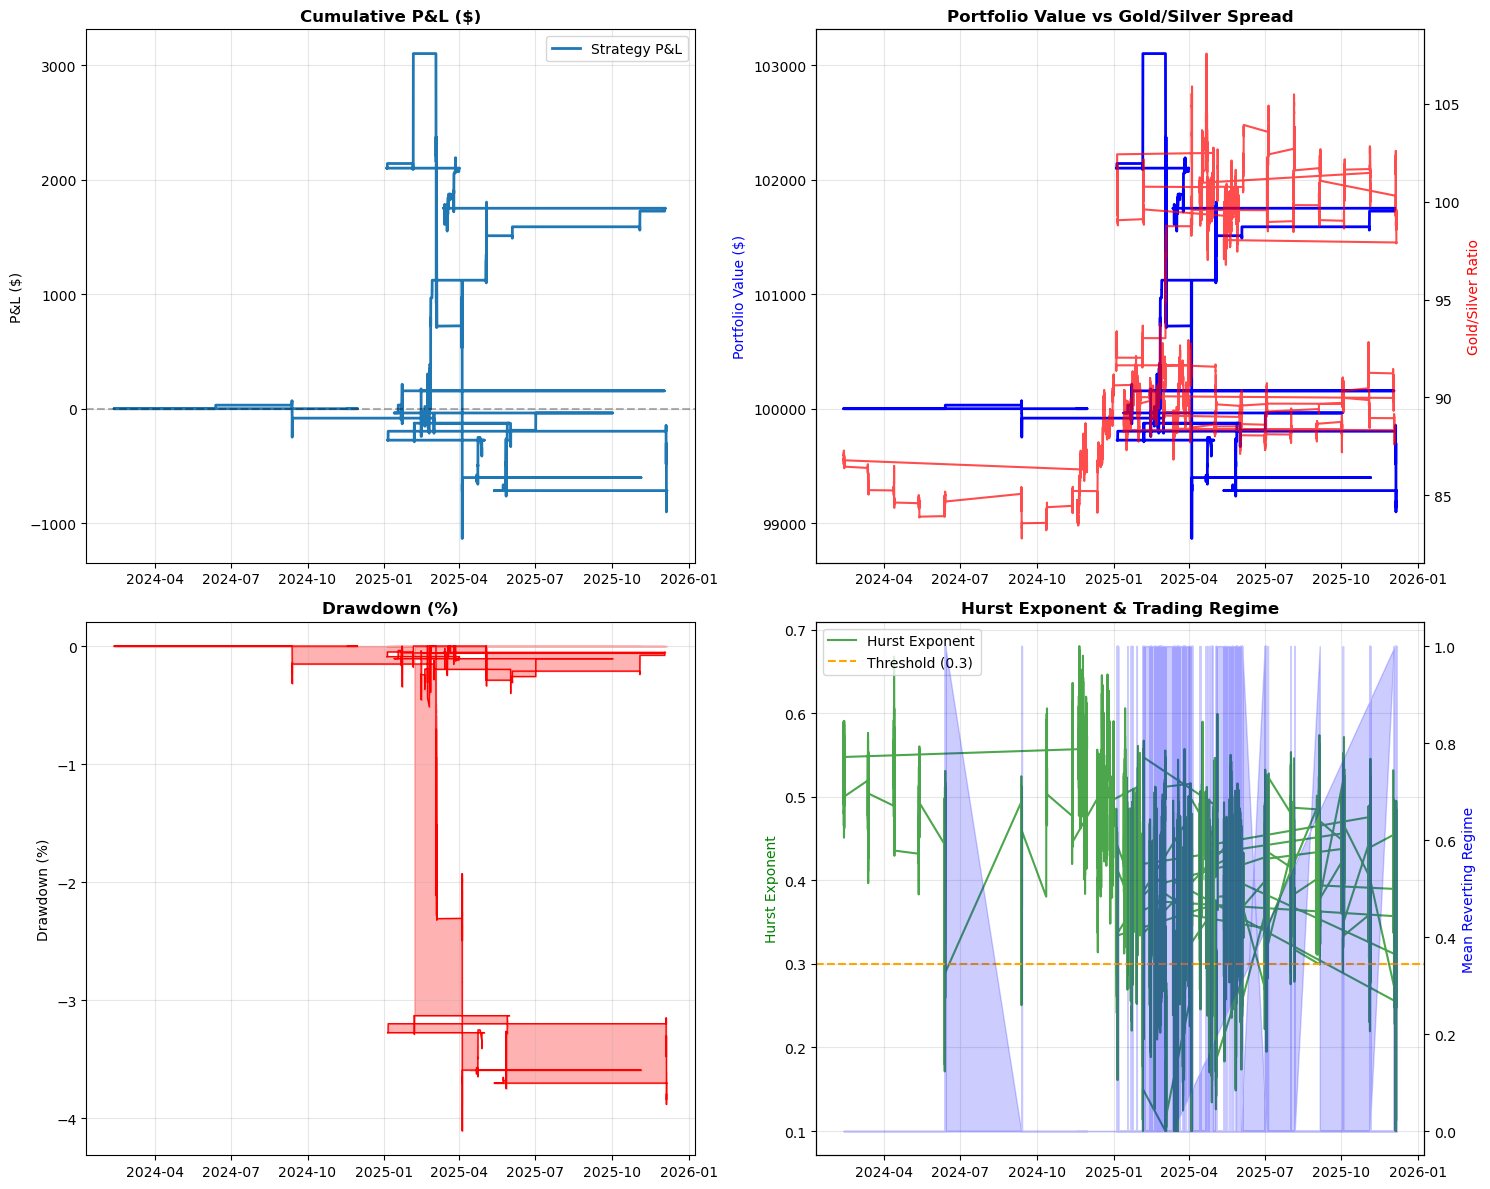

In [6]:
strategy.plot_performance(results)